[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xuan-liang/Deep-Learning-Reading-Group/blob/main/Dec4-2020-Chapter2-Xian/Chapter%202%20xian%20version.ipynb)

## make sure you can run the following code

In [5]:
import warnings
warnings.filterwarnings("ignore")
import keras

ModuleNotFoundError: No module named 'keras'

otherwise run the following in the terminal

<img src="pics/keras.png" width="300"/>

# e-Book
<a href="http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf"  style="font-size:30px"><center>Download the book</a>
<div>
<img src="pics/cover.png" width="300"/>
</div>


# Introduction
<div>
<img src="pics/ai vs dl.png" width="300"/>
    <img src="pics/ls.png" width="300"/>
</div>


# Data representations for neural networks

Data stored in multidimensional Numpy
arrays, also called tensors. 

In general, all current machine-learning systems use tensors
as their basic data structure. 

In [ ]:
 ## Scalars (0D tensors)

In [1]:
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)
print(x.shape)

12
0
()


## Vectors (1D tensors)

In [2]:
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)
print(x.shape)

[12  3  6 14]
1
(4,)


## Matrices (2D tensors)

In [4]:
 x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
print(x)
print(x.ndim)
print(x.shape)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2
(3, 5)


## 3D tensors and higher-dimensional tensors

In [5]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
print(x)
print(x.ndim)
print(x.shape)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3
(3, 3, 5)


<div>
<img src="pics/tensor.png" width="500"/>
</div>
<div>
<img src="pics/tensor2.jpeg" width="800"/>
</div>

## MNIST
It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the
“Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected.
<div>
<img src="pics/mnist.png" width="500"/>
</div>
60,000 grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST
dataset, a classic in the machine-learning community, which has been around almost
as long as the field itself and has been intensively studied.

In [6]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim,"we have here is a 3D tensor ")
print(train_images.shape,"60,000 matrices of 28 × 28 integers. ")
print(train_images.dtype,"8-bit integers")

3 we have here is a 3D tensor 
(60000, 28, 28) 60,000 matrices of 28 × 28 integers. 
uint8 8-bit integers


## Displaying the fourth digit

2 we have here is a 2D tensor 
(28, 28) a matrix of 28 × 28 integers. 


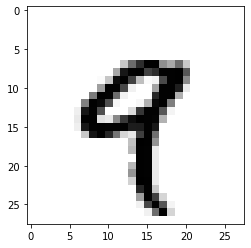

In [8]:
digit = train_images[4]
print(digit.ndim,"we have here is a 2D tensor ")
print(digit.shape,"a matrix of 28 × 28 integers. ")
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Manipulating tensors in Numpy

In [9]:
my_slice = train_images[10:100]
print("we selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28)")
print(my_slice.shape)
my_slice = train_images[10:100, :, :]
print(my_slice.shape,"Equivalent to the previous example")
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape,"Equivalent to the previous example")

we selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28)
(90, 28, 28)
(90, 28, 28) Equivalent to the previous example
(90, 28, 28) Equivalent to the previous example


In general, you may select between any two indices along each tensor axis. For
instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you
do this:

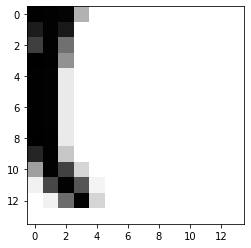

In [10]:
my_slice = train_images[:, 14:, 14:]
digit = my_slice[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

It’s also possible to use negative indices. Much like negative indices in Python lists,
they indicate a position relative to the end of the current axis. In order to crop the
images to patches of 14 × 14 pixels centered in the middle, you do this:

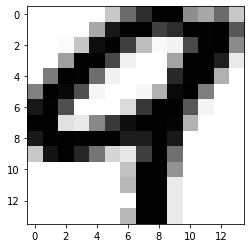

In [11]:
my_slice = train_images[:, 7:-7, 7:-7]
digit = my_slice[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll
come across in deep learning will be the samples axis (sometimes called the samples
dimension). In the MNIST example, samples are images of digits.
 In addition, deep-learning models don’t process an entire dataset at once; rather,
they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128:

In [12]:
batch = train_images[:128]
batch = train_images[128:256]
n=125
batch = train_images[128 * n:128 * (n + 1)]

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or
batch dimension.

## Real-world examples of data tensors

* Vector data—2D tensors of shape (samples, features)
* Timeseries data or sequence data—3D tensors of shape (samples, timesteps,
features)
* Images—4D tensors of shape (samples, height, width, channels) or (samples,
channels, height, width)
* Video—5D tensors of shape (samples, frames, height, width, channels) or
(samples, frames, channels, height, width)



## Vector data
An actuarial dataset of people, where we consider each person’s age, ZIP code,
and income. Each person can be characterized as a vector of 3 values, and thus
an entire dataset of 100,000 people can be stored in a 2D tensor of shape
(100000, 3).

<div>
<img src="pics/vect data.gif" width="500"/>
</div>

## Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense
to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a
sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D
tensor (see figure 2.3).
<div>
<img src="pics/ts.png" width="500"/>
</div>

## Image data  (Spatial feature learning)
A batch of 128 grayscale images of
size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a
batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3)
<div>
<img src="pics/im.png" width="500"/>
</div>

## Video data (Spatio-temporal feature learning)

Video data is one of the few types of real-world data for which you’ll need 5D tensors.
A video can be understood as a sequence of frames, each frame being a color image.
Because each frame can be stored in a 3D tensor (height, width, color_depth), a
sequence of frames can be stored in a 4D tensor (frames, height, width, color_
depth), and thus a batch of different videos can be stored in a 5D tensor of shape
(samples, frames, height, width, color_depth).

# The gears of neural networks: tensor operations
All transformations learned
by deep neural networks can be reduced to a handful of tensor operations applied to
tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors,
and so on.
<div>
<img src="pics/nn.png" width="500"/>
</div>


<div>
<img src="pics/act-fun.jpg" width="1000"/>
</div>




* Two additional major benefits of ReLUs are sparsity and a reduced likelihood of vanishing gradient.

* One point to mention is that the gradient is stronger for tanh than sigmoid ( derivatives are steeper). 



 In our initial example, we were building our network by stacking Dense layers on
top of each other. A Keras layer instance looks like this:

In [13]:
keras.layers.Dense(512, activation='relu')

$$\Huge output = relu(dot(W, input) + b)$$

Let’s unpack this. We have three tensor operations here: 
+ a dot product (dot) between the input tensor and a tensor named W; 
+ an addition (+) between the resulting 2D tensor and a vector b; 
+ and, finally, a relu operation. relu(x) is max(x, 0).

In [14]:
import numpy as np
x = np.array([[1,2],
              [2,1]])
y = np.array([[4,-5],
              [3,-2]])
z = np.dot(x, y)
print("x . y=",z)
z = z + np.array([[1],[2]])
print("z + b=",z)
z = np.maximum(z, 0)
print("max(z,0)=",z)


x . y= [[ 10  -9]
 [ 11 -12]]
z + b= [[ 11  -8]
 [ 13 -10]]
max(z,0)= [[11  0]
 [13  0]]


<div>
<img src="pics/dot prod.png" width="500"/>
</div>

# Tensor reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial
tensor. Reshaping is best understood via simple examples:

In [15]:
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])
print(x)
print("the shape is",x.shape)
x = x.reshape((6, 1))
print(x)
x = x.reshape((2, 3))
print(x)

[[0. 1.]
 [2. 3.]
 [4. 5.]]
the shape is (3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0. 1. 2.]
 [3. 4. 5.]]


## Geometric interpretation of tensor operations

<div>
<img src="pics/meaning of vec.png" width="800"/>
 <img src="pics/meaning of sum vec.png" width="800"/>

</div>

## A geometric interpretation of deep learning

It follows that you can interpret a neural network as a very complex geometric transformation in a high-dimensional space, implemented via a long series of simple steps.
 
 In 3D, the following mental image may prove useful. Imagine two sheets of colored
paper: one red and one blue. Put one on top of the other. Now crumple them
together into a small ball. 

That crumpled paper ball is your input data, and each sheet
of paper is a class of data in a classification problem. What a neural network (or any
other machine-learning model) is meant to do is figure out a transformation of the
paper ball that would uncrumple it, so as to make the two classes cleanly separable
again. With deep learning, this would be implemented as a series of simple transformations of the 3D space, such as those you could apply on the paper ball with your fingers, one movement at a time.




<div>
<img src="pics/manifold.png" width="800"/>
        $\Huge \text{We need to unfold the data.}$
  <img src="pics/manifold2.jpeg" width="800"/>

  <img src="pics/manifold.jpeg" width="800"/>
  <img src="pics/spiral.gif" width="500"/>
</div>

# The engine of neural networks: gradient-based optimization




<div>
<img src="pics/dev.png" width="300"/>
</div>

## Gradient descent


 You can reduce $f(x)$ by moving $x$ in the opposite
direction from the gradient: for example, $x_1 = x_0 - step * gradient(f)(x_0)$


Note that the scaling factor step is needed
because gradient only approximates the curvature when you’re close to $x_0$,
so you don’t want to get too far from $x_0$.

<div>
<img src="pics/lr.png" width="800"/>
</div>

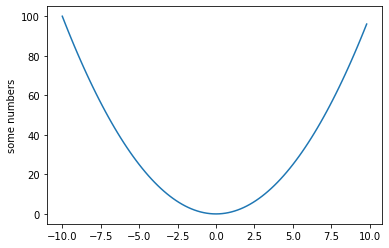

In [16]:
def f(x):
    y=x**2
    return y
import matplotlib.pyplot as plt
x=np.arange(-10, 10, 0.2)
y=f(x)
plt.plot(x,y)
plt.ylabel('some numbers')
plt.show()


In [17]:
def f(x):
    y=x**2
    return y
def derivative(f,x):
    e=0.00000000000001
    return (f(x+e)-f(x))/e
def SGD(f,x,step):
    x_0=x
    x_1=x_0-step*derivative(f,x)
    index=1
    while abs(x_0-x_1)>0.0000001:
        x_0=x_1
        x_1=x_0-step*derivative(f,x_0)
        index+=1
        if index>100000:
            return x_1,index,"not converge"
    return x_1,index
print(SGD(f,2,0.001))
print(SGD(f,2,0.01))
print(SGD(f,2,0.0001))
print(SGD(f,2,1))

(4.980149483244654e-05, 5296)
(4.853923665009301e-06, 640)
(0.0004998872589312308, 41477)
(-3.773159728050814, 100001, 'not converge')


Gradient descent direction's cheaper to calculate, and performing a line search in that direction is a more reliable, steady source of progress toward an optimum. In short, gradient descent's relatively reliable.

Newton's method is relatively expensive in that you need to calculate the Hessian on the first iteration. Then, on each subsequent iteration, you can either fully recalculate the Hessian (as in Newton's method) or merely "update" the prior iteration's Hessian (in quasi-Newton methods) which is cheaper but less robust.

## Stochastic gradient descent

1 Draw a batch (subsample) of training samples $x$ and corresponding targets $y$.

2 Run the network on $x$ to obtain predictions $y_pred$.

3 Compute the loss of the network on the batch, a measure of the mismatch
between $y_pred$ and $y$.

4 Compute the gradient of the loss with regard to the network’s parameters (a
backward pass).

5 Move the parameters a little in the opposite direction from the gradient—for
example $\beta_0=\beta_1- step * gradient$ thus reducing the loss on the batch a bit.

The term stochastic refers to the fact that each batch of data is drawn at
random (stochastic is a scientific synonym of random).

<div>
<img src="pics/SGD.png" width="500"/>
</div>

Unlike the batch gradient descent which computes the gradient using the whole dataset, because the SGD, also known as incremental gradient descent, tries to find minimums or maximums by iteration from a single randomly picked training subsample.
This can also have the advantage that stochastic gradient descent can escape shallow local minima more easily.

In many big data setting (say several million data points), calculating cost or gradient takes very long time, because we need to sum over all data points.
We do NOT need to have exact gradient to reduce the cost in a given iteration. 

Some approximation of gradient would work OK.




## Local minimum vs Global minimum


<div>
<img src="pics/lm vs gm.png" width="500"/>
</div>

As you can see, around a certain parameter value, there is a local minimum: around
that point, moving left would result in the loss increasing, but so would moving right.

If the parameter under consideration were being optimized via SGD with a small
learning rate, then the optimization process would get stuck at the local minimum
instead of making its way to the global minimum.


 You can avoid such issues by using momentum, which draws inspiration from physics. A useful mental image here is to think of the optimization process as a small ball
rolling down the loss curve. If it has enough momentum, the ball won’t get stuck in a
ravine and will end up at the global minimum. 

<div>
<img src="pics/mm.png" width="200"/>
</div>


Momentum is implemented by moving
the ball at each step based not only on the current slope value (current acceleration)
but also on the current velocity (resulting from past acceleration).

<div>
<img src="pics/mm al.png" width="800"/>
</div>

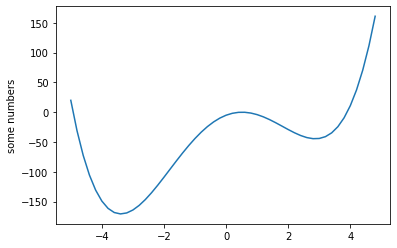

(2.9038989295077045, 53)
(-3.43964815227082, 35)


In [18]:
def f(x):
    y=x**4-20*(x-1/2)**2
    return y
import matplotlib.pyplot as plt
x=np.arange(-5, 5, 0.2)
y=f(x)
plt.plot(x,y)
plt.ylabel('some numbers')
plt.show()
print(SGD(f,5,0.001))
print(SGD(f,-5,0.001))


In [19]:
def f(x):
    y=x**4-20*(x-1/2)**2
    return y
def SGD_mom(f,x,step):
    past_velocity = 0.
    momentum = 0.5
    x_0=x
    x_1=x_0-step*derivative(f,x)
    index=1
    while abs(x_0-x_1)>0.00001:
        velocity = past_velocity * momentum + step*derivative(f,x_0)
        x_0=x_1
        x_1=x_0-velocity*momentum-step*derivative(f,x_0)
        past_velocity = velocity
        index+=1
        if index>100000:
            return x_1,index,"not converge"
    return x_1,index

print(SGD_mom(f,5,0.01))
print(SGD_mom(f,-5,0.01))


(-3.377025240067833, 6835)
(-3.3799684481052354, 14742)


Does not have notion of where it is going so does not slow down before the hill slopes up again. It is not adpative

## Chaining derivatives: the Backpropagation algorithm

Applying the chain rule to the
computation of the gradient values of a neural network gives rise to an algorithmcalled Backpropagation (also sometimes called reverse-mode differentiation). 

Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter
had in the loss value.

<div>
<img src="pics/nn.png" width="500"/>
</div>


<div>
<img src="pics/back.png" width="800"/>
</div>


# Real data

$\Huge  \color{red}{\text{Restart the kernel before run the real data code!}}$

## Loading MNIST dataset

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/sit

## Add two layers

In [2]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

<div>
<img src="pics/nnar.png" width="1000"/>
</div>


## Optimisation
In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs.

In [3]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2545 - accuracy: 0.9251
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1015 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0676 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0375 - accuracy: 0.9888


## Test accuracy

In [4]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 29us/step
test_acc: 0.9799000024795532
